<a id="100"></a>
**HOME**

**ADR (Average Daily Range)** is a popular technical indicator used in trading to measure the average price movement (range) of a financial instrument during a single trading day over a specific period.

* **Measures Volatility: High-Low**
* **Risk Management: SL and TP**
* **Strategy Optimization: Breakout, Trend Following, Interval Trading**

### Table of Contents
* [1-Dataset](#1)
* [2-Monthly ADR](#2)
* [3-Date ADR: ALL DATA](#3)
* [4-Daily ADR](#4)
* [5-Hourly ADR](#5)

**References:**

- [Trend-Enhanced Improved Bollinger Bands Trend-Following High-Frequency Trading Strategy for Futures Market](https://drpress.org/ojs/index.php/HBEM/article/view/16586)
- [Research on Quantitative Trading Strategies Based on the Turtle Trading Rule](https://drpress.org/ojs/index.php/HBEM/article/view/7933)
- [Day Trading Strategy Based on Transformer Model, Technical Indicators and Multiresolution Analysis.](https://openurl.ebsco.com/EPDB%3Agcd%3A4%3A10823716/detailv2?sid=ebsco%3Aplink%3Ascholar&id=ebsco%3Agcd%3A177050350&crl=c&link_origin=scholar.google.com)
- [Algorithmic trading system based on technical indicators in artificial intelligence: A review](https://pubs.aip.org/aip/acp/article-abstract/2484/1/060003/2879570/Algorithmic-trading-system-based-on-technical)
- [Integrated Hybrid Approaches for Stock Market Prediction with Deep Learning, Technical Analysis, and Reinforcement Learning](https://dl.acm.org/doi/abs/10.1145/3628797.3629018)
- [Predictive Modeling of Foreign Exchange Trading Signals Using Machine Learning Techniques](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4862571)

____

<a id="1"></a>
**1-Dataset:**

In [1]:
symbol = 'BTCUSDT'

In [2]:
from binance.client import Client  # we have to replace by requests
import pandas as pd
import time

# Initialize the Binance client
api_key = "sytvkKKUmXPabC877r7MFv7rhibYAMoczrMdTse0OSB6dRyImx1G8yEInE889y00"
api_secret = "KYgkq441X5spXpdDoLELwlcoJ3k7uh9LeXGgf7aQvABSMZl42Py3OUIwFCqVgc6L" # LOAD FROM CSV
client = Client(api_key, api_secret)

def fetch_ohlcv_batch(client, symbol, interval, start_time, limit=1000):
    """
    Fetch a batch of OHLCV data from Binance.
    """
    try:
        candles = client.get_klines(
            symbol=symbol,
            interval=interval,
            startTime=start_time,
            limit=limit
        )
        # Transform data into desired format
        ohlcv = [
            [int(c[0]), float(c[1]), float(c[2]), float(c[3]), float(c[4]), float(c[5])]
            for c in candles
        ]
        return ohlcv
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def fetch_historical_ohlcv(client, symbol, interval, start_time, limit=1000):
    """
    Fetch historical OHLCV data in batches from Binance.
    """
    all_data = []
    while True:
        data = fetch_ohlcv_batch(client, symbol, interval, start_time, limit)
        if data:
            # Append data to all_data
            all_data.extend(data)
            # Update `start_time` to the timestamp of the last fetched data point + 1 millisecond
            start_time = data[-1][0] + 1
            print(f"Fetched {len(data)} data points. Total so far: {len(all_data)}")
        else:
            print("No more data to fetch or an error occurred.")
            break

        # If the batch size is less than the limit, it means we reached the end of available data
        if len(data) < limit:
            print("Reached the end of available data.")
            break

        # To avoid rate limit issues, wait for a short while
        time.sleep(1)

    # Convert data to DataFrame
    df_daily = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df_daily['timestamp'] = pd.to_datetime(df_daily['timestamp'], unit='ms')
    return df_daily

# Usage example
if __name__ == "__main__":
    # Define parameters
    # symbol = 'BTCUSDT'        # Symbol to fetch (without '/')
    interval = Client.KLINE_INTERVAL_1DAY  # Timeframe ('1m', '5m', '1h', '1d', etc.)
    start_time = int(pd.Timestamp("2007-01-01").timestamp() * 1000)  # Start date in milliseconds
    limit = 1000              # Max data points per batch

    # Fetch historical data
    df_daily = fetch_historical_ohlcv(client, symbol, interval, start_time, limit)
    print(f"Total fetched data points: {len(df_daily)}")
    print(df_daily.head())

Fetched 1000 data points. Total so far: 1000
Fetched 1000 data points. Total so far: 2000
Fetched 715 data points. Total so far: 2715
Reached the end of available data.
Total fetched data points: 2715
   timestamp     open     high      low    close       volume
0 2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377
1 2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264
2 2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763
3 2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022
4 2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060


In [3]:
from binance.client import Client
import pandas as pd
import time

# Initialize the Binance client
api_key = "sytvkKKUmXPabC877r7MFv7rhibYAMoczrMdTse0OSB6dRyImx1G8yEInE889y00"
api_secret = "KYgkq441X5spXpdDoLELwlcoJ3k7uh9LeXGgf7aQvABSMZl42Py3OUIwFCqVgc6L"
client = Client(api_key, api_secret)

def fetch_ohlcv_batch(client, symbol, interval, start_time, limit=1000):
    """
    Fetch a batch of OHLCV data from Binance.
    """
    try:
        candles = client.get_klines(
            symbol=symbol,
            interval=interval,
            startTime=start_time,
            limit=limit
        )
        # Transform data into desired format
        ohlcv = [
            [int(c[0]), float(c[1]), float(c[2]), float(c[3]), float(c[4]), float(c[5])]
            for c in candles
        ]
        return ohlcv
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def fetch_historical_ohlcv(client, symbol, interval, start_time, limit=1000):
    """
    Fetch historical OHLCV data in batches from Binance.
    """
    all_data = []
    while True:
        data = fetch_ohlcv_batch(client, symbol, interval, start_time, limit)
        if data:
            # Append data to all_data
            all_data.extend(data)
            # Update `start_time` to the timestamp of the last fetched data point + 1 millisecond
            start_time = data[-1][0] + 1
            print(f"Fetched {len(data)} data points. Total so far: {len(all_data)}")
        else:
            print("No more data to fetch or an error occurred.")
            break

        # If the batch size is less than the limit, it means we reached the end of available data
        if len(data) < limit:
            print("Reached the end of available data.")
            break

        # To avoid rate limit issues, wait for a short while
        time.sleep(1)

    # Convert data to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Usage example
if __name__ == "__main__":
    # Define parameters
    # symbol = 'BTCUSDT'        # Symbol to fetch (without '/')
    interval = Client.KLINE_INTERVAL_1HOUR  # Changed to hourly ('1h')
    start_time = int(pd.Timestamp("2020-01-01").timestamp() * 1000)  # Start date in milliseconds
    limit = 1000              # Max data points per batch

    # Fetch historical data
    df_hourly = fetch_historical_ohlcv(client, symbol, interval, start_time, limit)
    print(f"Total fetched data points: {len(df_hourly)}")
    print(df_hourly.head())

Fetched 1000 data points. Total so far: 1000
Fetched 1000 data points. Total so far: 2000
Fetched 1000 data points. Total so far: 3000
Fetched 1000 data points. Total so far: 4000
Fetched 1000 data points. Total so far: 5000
Fetched 1000 data points. Total so far: 6000
Fetched 1000 data points. Total so far: 7000
Fetched 1000 data points. Total so far: 8000
Fetched 1000 data points. Total so far: 9000
Fetched 1000 data points. Total so far: 10000
Fetched 1000 data points. Total so far: 11000
Fetched 1000 data points. Total so far: 12000
Fetched 1000 data points. Total so far: 13000
Fetched 1000 data points. Total so far: 14000
Fetched 1000 data points. Total so far: 15000
Fetched 1000 data points. Total so far: 16000
Fetched 1000 data points. Total so far: 17000
Fetched 1000 data points. Total so far: 18000
Fetched 1000 data points. Total so far: 19000
Fetched 1000 data points. Total so far: 20000
Fetched 1000 data points. Total so far: 21000
Fetched 1000 data points. Total so far: 220

<a name="id"></a>
[**Back to HOME**](#100)

<a id="2"></a>
**2-Monthly ADR:**

In [4]:
from datetime import timedelta
import pandas as pd

def calculate_monthly_average_range(df_daily, years):
    """
    Calculate monthly average range for a specific number of years
    
    Parameters:
    df_daily (pd.DataFrame): DataFrame with daily price data
    years (int): Number of years to look back
    
    Returns:
    float: Monthly average range for the period
    """
    # Calculate the start date for the period
    period_start = df_daily['timestamp'].max() - timedelta(days=365 * years)
    
    # Filter data for the period and create a copy to avoid warnings
    df_period = df_daily[df_daily['timestamp'] >= period_start].copy()
    
    # Calculate range (high - low) using loc
    df_period.loc[:, 'range'] = df_period['high'] - df_period['low']
    
    # Add month and year column
    df_period.loc[:, 'month_year'] = df_period['timestamp'].dt.to_period('M')
    
    # Calculate monthly averages
    monthly_ranges = df_period.groupby('month_year')['range'].mean()
    
    # Calculate overall monthly average range
    avg_monthly_range = monthly_ranges.mean()
    
    return avg_monthly_range

# Calculate monthly average range for 1-10 years
range_results = {}
for years in range(1, 11):  # Changed range to start from 1
    avg_range = calculate_monthly_average_range(df_daily, years)
    range_results[f'{years} Years'] = round(avg_range, 2)

# Create a summary DataFrame
summary_df_monthly = pd.DataFrame.from_dict(range_results, orient='index', columns=['Monthly Average Range'])
summary_df_monthly.index.name = 'Time Period'
summary_df_monthly

,Monthly Average Range
Time Period,
1 Years,2804.03
2 Years,1940.90
3 Years,1758.40
4 Years,2083.40
5 Years,1790.22
6 Years,1560.05
7 Years,1407.65
8 Years,1379.52
9 Years,1379.52


In [5]:
# Finding the year with the smallest average monthly range
lowest_monthly_range_year = summary_df_monthly['Monthly Average Range'].idxmin()
lowest_monthly_range_value = summary_df_monthly['Monthly Average Range'].min()

# Extracting only the year number
lowest_year = int(lowest_monthly_range_year.split(' ')[0])

print(f"The year with the smallest average monthly range: {lowest_year}")
print(f"The smallest average monthly range: {lowest_monthly_range_value}")

The year with the smallest average monthly range: 8
The smallest average monthly range: 1379.52


In [6]:
xdays=lowest_year*365

In [7]:
xdays

2920

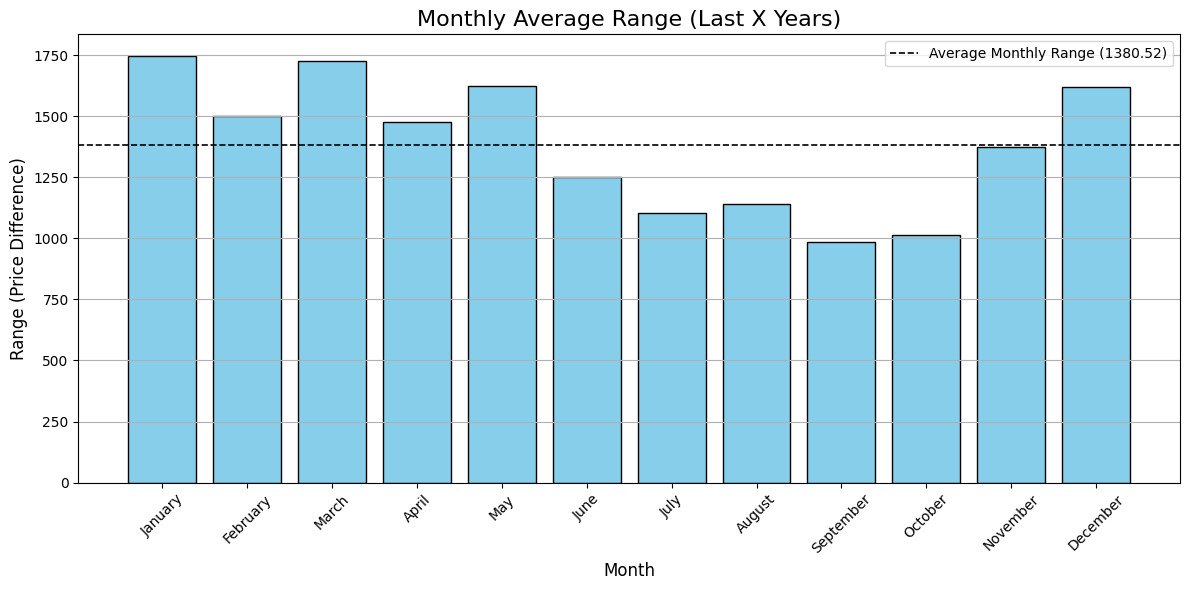

In [8]:
from datetime import timedelta
import matplotlib.pyplot as plt

# Step 1: Filter data for the last X days (e.g., 730 days = 2 years)
months_ago = df_daily['timestamp'].max() - timedelta(days=xdays)
df_last = df_daily[df_daily['timestamp'] >= months_ago].copy()  # Use .copy() to avoid the warning

# Step 2: Calculate Monthly Range (High - Low Difference)
df_last['range'] = df_last['high'] - df_last['low']

# Step 3: Add a 'month_name' column for grouping by month (January, February, etc.)
df_last['month_name'] = df_last['timestamp'].dt.month_name()

# Step 4: Group by 'month_name' and calculate the average monthly range
monthly_range_last = df_last.groupby('month_name')['range'].mean()

# Sort by calendar order (January to December)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_range_last = monthly_range_last.reindex(month_order)

# Step 5: Plot the monthly range
plt.figure(figsize=(12, 6))
plt.bar(monthly_range_last.index, monthly_range_last, color='skyblue', edgecolor='black')

# Highlight the Average Line
avg_range_monthly = monthly_range_last.mean()
plt.axhline(y=avg_range_monthly, color='black', linestyle='--', linewidth=1.2, label=f'Average Monthly Range ({avg_range_monthly:.2f})')

# Add Labels and Title
plt.title('Monthly Average Range (Last X Years)', fontsize=16)
plt.ylabel('Range (Price Difference)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
import math

monthly_adr_threshold = math.ceil(avg_range_monthly)

In [10]:
monthly_adr_threshold

1381

<a name="id"></a>
[**Back to HOME**](#100)

<a id="3"></a>
**3-Date ADR: ALL DATA**

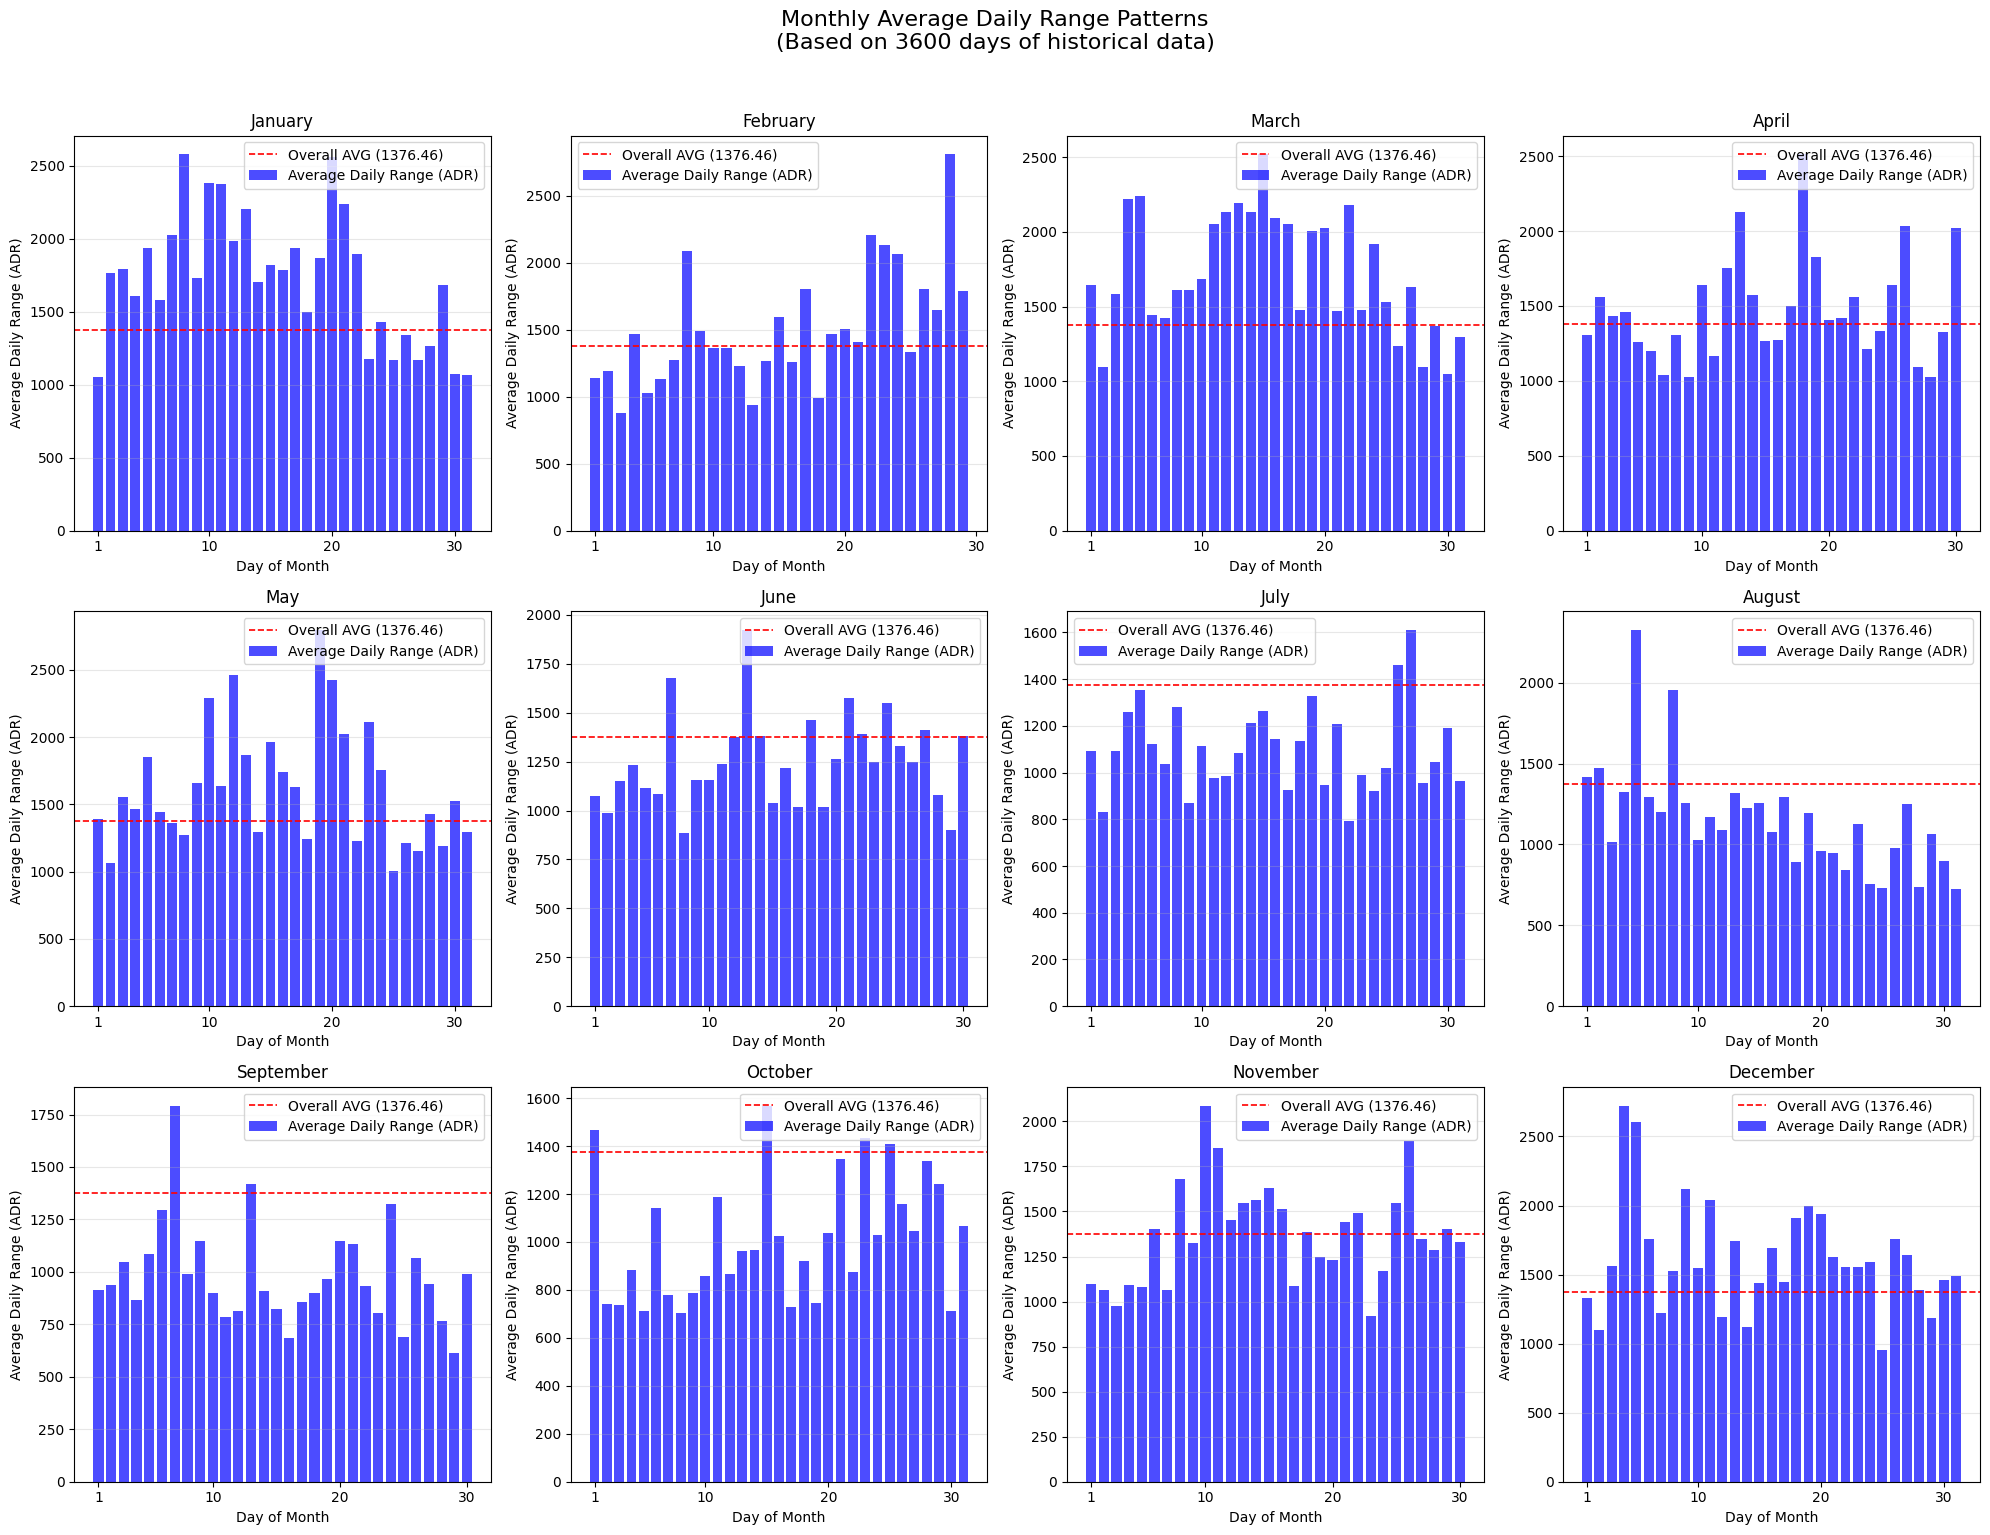


Monthly Average Daily Range Statistics:
           Mean ADR  Std Dev  Min ADR   Max ADR
January     1748.03  1720.47    54.25  10038.00
February    1498.99  1647.10    30.54   9886.47
March       1725.99  1690.37    33.55   9995.00
April       1476.32  1526.64    80.52   9567.70
May         1623.64  1820.38    85.80  13584.90
June        1252.40  1122.35   122.43   5137.97
July        1104.04   951.86    87.53   5344.22
August      1142.70  1261.49    99.79   9305.59
September    984.83  1118.47    99.32  10076.95
October     1015.28  1168.31    59.93   6083.00
November    1373.43  1490.71    64.55   9314.53
December    1620.63  1773.54    85.58  13588.00


In [11]:
from datetime import timedelta
import matplotlib.pyplot as plt
import calendar

# Step 1: Filter the last 1080 days with a proper copy
thousand_days_ago = df_daily['timestamp'].max() - timedelta(days=3650)
df_last_thousanddays = df_daily[df_daily['timestamp'] >= thousand_days_ago].copy()

# Step 2: Calculate Average Daily Range (High-Low Difference)
df_last_thousanddays['adr'] = df_last_thousanddays['high'] - df_last_thousanddays['low']

# Step 3: Extract month and day separately
df_last_thousanddays['month'] = df_last_thousanddays['timestamp'].dt.month
df_last_thousanddays['day'] = df_last_thousanddays['timestamp'].dt.day
df_last_thousanddays['month_day'] = df_last_thousanddays['timestamp'].dt.strftime('%m-%d')

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

# Calculate overall average for reference line
overall_avg = df_last_thousanddays['adr'].mean()

# Process each month
for month in range(1, 13):
    # Get data for current month
    month_data = df_last_thousanddays[df_last_thousanddays['month'] == month]
    monthly_adr = month_data.groupby('day')['adr'].mean()
    
    # Plot in the corresponding subplot (month-1 because arrays are 0-based)
    ax = axes[month-1]
    
    # Create bar plot
    ax.bar(monthly_adr.index, monthly_adr.values, 
           color='blue', alpha=0.7, label='Average Daily Range (ADR)')
    
    # Add average line
    ax.axhline(y=overall_avg, color='red', linestyle='--', linewidth=1.2,
               label=f'Overall AVG ({overall_avg:.2f})')
    
    # Customize subplot
    ax.set_title(calendar.month_name[month])
    ax.set_xlabel('Day of Month')
    ax.set_ylabel('Average Daily Range (ADR)')
    ax.grid(axis='y', alpha=0.3)
    ax.legend()
    
    # Set x-axis ticks
    ax.set_xticks([1, 10, 20, 30])

# Adjust layout
plt.suptitle('Monthly Average Daily Range Patterns\n(Based on 3600 days of historical data)', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Additional analysis: Print monthly statistics
monthly_stats = df_last_thousanddays.groupby('month').agg({
    'adr': ['mean', 'std', 'min', 'max']
}).round(2)

monthly_stats.columns = ['Mean ADR', 'Std Dev', 'Min ADR', 'Max ADR']
monthly_stats.index = [calendar.month_name[month] for month in range(1, 13)]
print("\nMonthly Average Daily Range Statistics:")
print(monthly_stats)

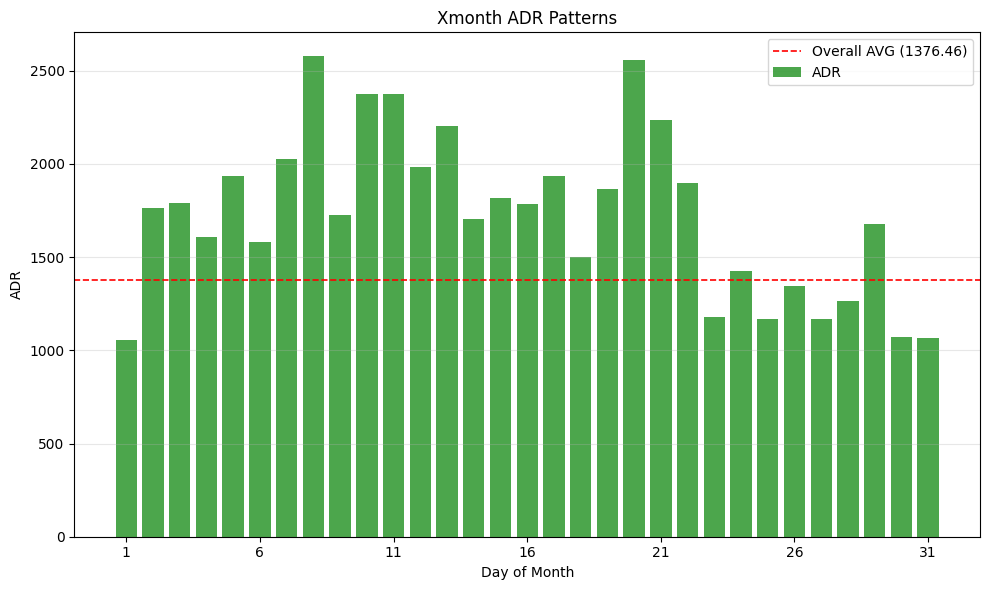


Xmonth ADR Statistics:
mean     1748.03
std      1720.47
min        54.25
max     10038.00
Name: ADR, dtype: float64


In [12]:
from datetime import timedelta
import matplotlib.pyplot as plt
import calendar

# Step 1: Filter the last 3600 days with a proper copy
three_thousand_six_hundred_days_ago = df_daily['timestamp'].max() - timedelta(days=3600)
df_last_days = df_daily[df_daily['timestamp'] >= three_thousand_six_hundred_days_ago].copy()

# Step 2: Calculate Average Daily Range (ADR)
df_last_days['ADR'] = df_last_days['high'] - df_last_days['low']

# Step 3: Extract month and day separately
df_last_days['month'] = df_last_days['timestamp'].dt.month
df_last_days['day'] = df_last_days['timestamp'].dt.day

# Step 4: Filter for December (or a specific month)
xmonth_data = df_last_days[df_last_days['month'] == 1]  # Change `12` to another month if needed

# Calculate ADR for the specified month
xmonth_adr = xmonth_data.groupby('day')['ADR'].mean()

# Create a bar plot for the specified month
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
ax.bar(xmonth_adr.index, xmonth_adr.values, 
       color='green', alpha=0.7, label='ADR')

# Add overall average line
overall_avg = df_last_days['ADR'].mean()
ax.axhline(y=overall_avg, color='red', linestyle='--', linewidth=1.2, 
           label=f'Overall AVG ({overall_avg:.2f})')

# Customize plot
ax.set_title('Xmonth ADR Patterns')  # Adjust title if changing the month
ax.set_xlabel('Day of Month')
ax.set_ylabel('ADR')
ax.grid(axis='y', alpha=0.3)
ax.legend()

# Set x-axis ticks
ax.set_xticks(range(1, 32, 5))  # Adjust tick spacing as needed

# Show plot
plt.tight_layout()
plt.show()

# Additional analysis: Print December statistics
xmonth_stats = xmonth_data['ADR'].agg(['mean', 'std', 'min', 'max']).round(2)
print("\nXmonth ADR Statistics:")  # Adjust the month name if needed
print(xmonth_stats)


<a name="id"></a>
[**Back to HOME**](#100)

<a id="4"></a>
**4-Daily ADR:**

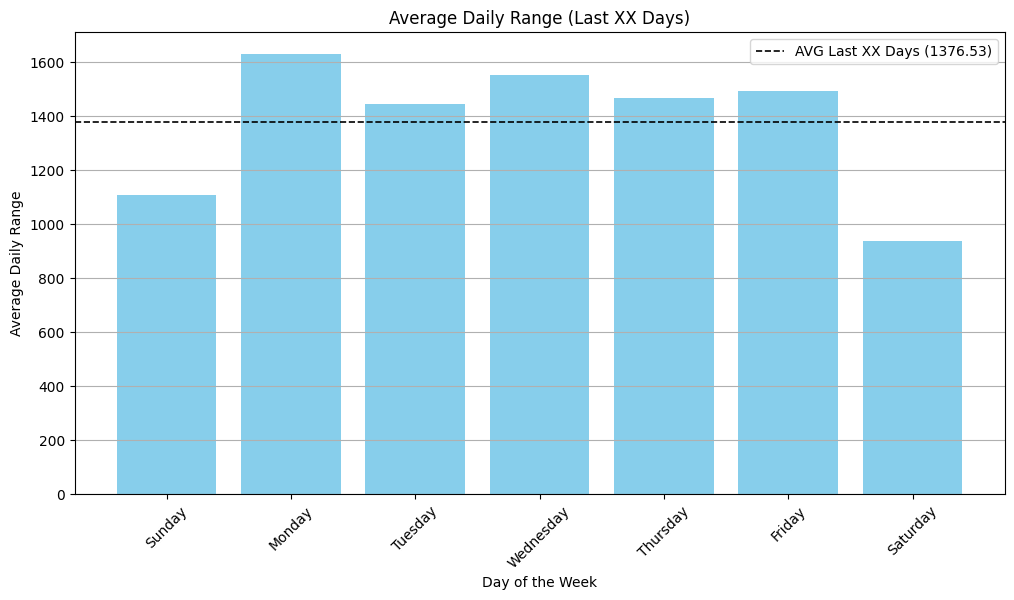

In [13]:
from datetime import timedelta
import matplotlib.pyplot as plt

# List of days to analyze
periods = [7, 30, 90, 180, 365, 1095, 1825, 3650]

# Dictionary to store results
avg_daily_ranges = {}

for days in periods:
    # Filter the last X days
    x_days_ago = df_daily['timestamp'].max() - timedelta(days=days)
    df_last_xdays = df_daily[df_daily['timestamp'] >= x_days_ago].copy()  # Use .copy() to avoid SettingWithCopyWarning
    
    # Calculate Average Daily Range
    df_last_xdays['adr'] = df_last_xdays['high'] - df_last_xdays['low']
    
    # Add day_name column
    df_last_xdays['day_name'] = df_last_xdays['timestamp'].dt.day_name()
    
    # Group by day_name and calculate mean ADR
    daily_range = df_last_xdays.groupby('day_name')['adr'].mean()
    
    # Sort by calendar order
    day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    daily_range = daily_range.reindex(day_order)
    
    # Calculate average ADR for this period
    avg_daily_range = daily_range.mean()
    
    # Store result in dictionary
    avg_daily_ranges[f'avg_adr_last_{days}days'] = avg_daily_range

avg_daily_ranges


# Find the period with the minimum average ADR
min_adr_period = min(avg_daily_ranges, key=avg_daily_ranges.get)
min_adr_value = avg_daily_ranges[min_adr_period]
days_for_min_adr = int(min_adr_period.split('_')[-1].replace('days', ''))


# Step 1: Filter the last X days based on the minimum ADR period
xxdays_days_ago = df_daily['timestamp'].max() - timedelta(days=days_for_min_adr)
df_last_xxdays = df_daily[df_daily['timestamp'] >= xxdays_days_ago].copy()  # Use .copy() to ensure a deep copy

# Step 2: Calculate Average Daily Range (High-Low Difference)
df_last_xxdays.loc[:, 'adr'] = df_last_xxdays['high'] - df_last_xxdays['low']

# Step 3: Add a 'day_name' column for grouping by day (Monday, Tuesday, etc.)
df_last_xxdays.loc[:, 'day_name'] = df_last_xxdays['timestamp'].dt.day_name()

# Step 4: Group by 'day_name' and calculate the mean of daily range
daily_range_last_xxdays = df_last_xxdays.groupby('day_name')['adr'].mean()

# Sort by calendar order (Sunday to Saturday)
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_range_last_xxdays = daily_range_last_xxdays.reindex(day_order)

# Step 5: Plot the daily range
plt.figure(figsize=(12, 6))
plt.bar(daily_range_last_xxdays.index, daily_range_last_xxdays, color='skyblue')

# Highlight the Average Line
daily_avg_range_last_xxdays = daily_range_last_xxdays.mean()
plt.axhline(y=daily_avg_range_last_xxdays, color='black', linestyle='--', linewidth=1.2, label=f'AVG Last XX Days ({daily_avg_range_last_xxdays:.2f})')

# Add labels and title
plt.title('Average Daily Range (Last XX Days)')
plt.ylabel('Average Daily Range')
plt.xlabel('Day of the Week')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<a name="id"></a>
[**Back to HOME**](#100)

<a id="5"></a>
**5-Hourly ADR:**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


def calculate_average_daily_range(df_hourly, days):
    # Convert timestamp to datetime if not already
    df_hourly['timestamp'] = pd.to_datetime(df_hourly['timestamp'])
    
    # Filter data for the specified days
    last_n_days = datetime.now() - timedelta(days=days)
    df_period = df_hourly[df_hourly['timestamp'] >= last_n_days].copy()  # Explicitly create a copy
    
    # Extract the date from timestamp
    df_period['date'] = df_period['timestamp'].dt.date
    
    # Group by Date and Calculate Daily Range (High - Low)
    daily_range = df_period.groupby('date').apply(lambda x: x['high'].max() - x['low'].min())
    
    # Calculate the Average Daily Range for the period
    average_daily_range = daily_range.mean()
    
    return average_daily_range

# List of days to analyze
days_list = [7, 30, 90, 180, 365, 1095, 1825, 3650, 7300, 10950]

# Calculate and print average daily range for each period
for days in days_list:
    avg_daily_range = calculate_average_daily_range(df_hourly, days)
    print(f"Average daily range for last {days} days: {avg_daily_range:.2f}")

# Dictionary to store average daily range for each period
daily_range_dict = {}

# Calculate average daily range for each period and store in dictionary
for days in days_list:
    avg_daily_range = calculate_average_daily_range(df_hourly, days)
    daily_range_dict[days] = avg_daily_range

# Find the day with the smallest average daily range
smallest_range_day = min(daily_range_dict, key=daily_range_dict.get)
smallest_range = daily_range_dict[smallest_range_day]

# Show only the day with the smallest average daily range
print(f"Day with smallest average daily range: {smallest_range_day} days ({smallest_range:.2f})")


Average daily range for last 7 days: 4788.55
Average daily range for last 30 days: 3853.87
Average daily range for last 90 days: 3797.27
Average daily range for last 180 days: 3121.11
Average daily range for last 365 days: 2854.70
Average daily range for last 1095 days: 1730.62
Average daily range for last 1825 days: 1795.12
Average daily range for last 3650 days: 1777.99
Average daily range for last 7300 days: 1777.99
Average daily range for last 10950 days: 1777.99
Day with smallest average daily range: 1095 days (1730.62)


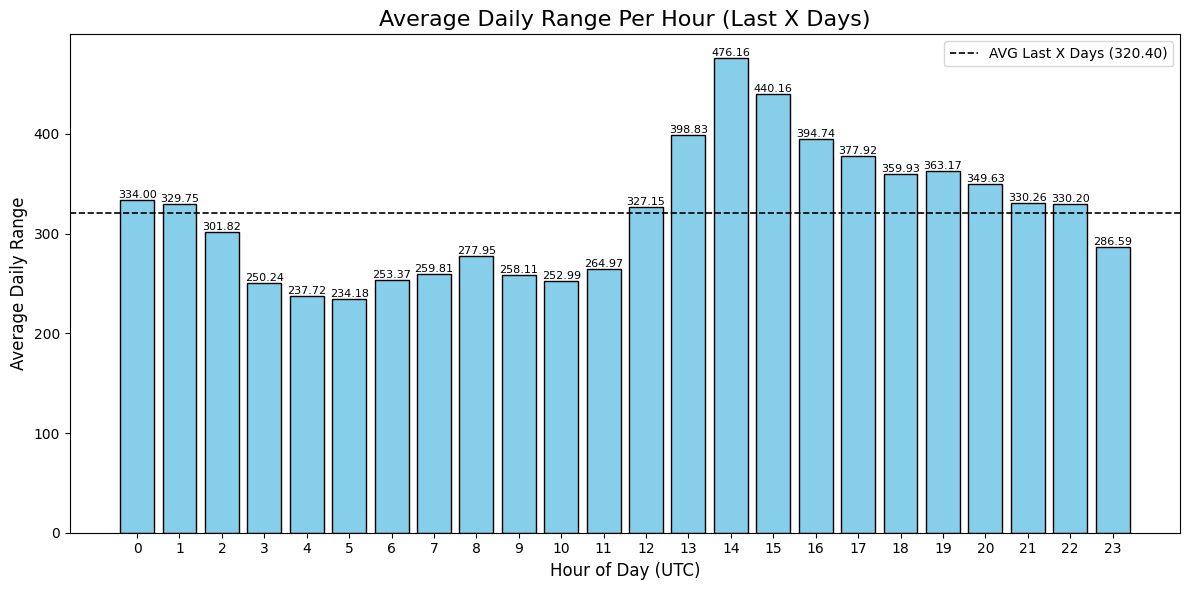

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Convert datetime to a pandas datetime object
df_hourly['timestamp'] = pd.to_datetime(df_hourly['timestamp'])

# Filter data for the last X days (e.g., smallest_volatility_day)
last_x_days = datetime.now() - timedelta(days=smallest_range_day)
df_last_x_days = df_hourly[df_hourly['timestamp'] >= last_x_days].copy()  # Use .copy() to avoid warnings

# Extract hour from datetime
df_last_x_days.loc[:, 'hour'] = df_last_x_days['timestamp'].dt.hour

# Calculate Hourly Average Daily Range (High-Low Difference)
df_last_x_days.loc[:, 'daily_range'] = df_last_x_days['high'] - df_last_x_days['low']

# Group by Hour and Calculate Average Daily Range
hourly_daily_range = df_last_x_days.groupby('hour')['daily_range'].mean()

# Prepare the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(hourly_daily_range.index, hourly_daily_range, color='skyblue', edgecolor='black')

# Highlight the Average Line
average_hourly_daily_range = hourly_daily_range.mean()
plt.axhline(y=average_hourly_daily_range, color='black', linestyle='--', linewidth=1.2, label=f'AVG Last X Days ({average_hourly_daily_range:.2f})')

# Annotate Bars with Values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Add Chart Labels and Title
plt.title('Average Daily Range Per Hour (Last X Days)', fontsize=16)
plt.xlabel('Hour of Day (UTC)', fontsize=12)
plt.ylabel('Average Daily Range', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.legend()

# Show the Plot
plt.tight_layout()
plt.show()

<a name="id"></a>
[**Back to HOME**](#100)